In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('training.csv')

In [3]:
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [4]:
df.dtypes

patient_id          int64
patient_race       object
payer_type         object
patient_state      object
patient_zip3        int64
                   ...   
veteran           float64
Ozone             float64
PM25              float64
N02               float64
DiagPeriodL90D      int64
Length: 83, dtype: object

In [5]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [6]:
df.describe(include='object')

,patient_race,payer_type,patient_state,patient_gender,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,Region,Division
count,6521,11103,12855,12906,12906,12906,12906,24,24,12854,12854
unique,5,3,50,1,50,50,43,2,1,4,9
top,White,COMMERCIAL,CA,F,1749,"Malignant neoplasm of breast (female), unspeci...",C773,PEMBROLIZUMAB,Antineoplastics,South,East North Central
freq,3588,6032,2438,12906,1982,1982,7052,13,24,3919,2923


In [12]:
## checking for uniques variable 
categorical_col= df.select_dtypes(include=['object', 'category']).columns

for col in categorical_col:
    unique_var = df[col].unique()
    print(f"Unique variable for {col}: {unique_var}")

Unique variable for patient_race: [nan 'White' 'Other' 'Hispanic' 'Asian' 'Black']
Unique variable for payer_type: ['MEDICAID' 'COMMERCIAL' 'MEDICARE ADVANTAGE' nan]
Unique variable for patient_state: ['CA' 'TX' 'ID' 'NY' 'IL' nan 'MI' 'OR' 'MT' 'KY' 'OH' 'IN' 'FL' 'CO' 'GA'
 'VA' 'MD' 'KS' 'WI' 'PA' 'NM' 'WA' 'MN' 'NC' 'AL' 'SC' 'LA' 'IA' 'TN'
 'HI' 'NE' 'AZ' 'MO' 'NV' 'SD' 'DC' 'AR' 'UT' 'WV' 'ND' 'OK' 'WY' 'DE'
 'NJ' 'MS' 'AK' 'PR' 'RI' 'CT' 'NH' 'MA']
Unique variable for patient_gender: ['F']
Unique variable for breast_cancer_diagnosis_code: ['C50919' 'C50411' 'C50112' 'C50212' '1749' 'C50912' 'C50512' '1744'
 'C50412' 'C50812' 'C50911' 'C50312' 'C50311' 'C50111' '1741' 'C5091'
 'C50811' '1748' 'C50511' '1743' 'C50211' 'C50011' 'C5051' 'C50012'
 'C50419' '1742' 'C50611' 'C50612' 'C50119' 'C50819' '1746' 'C5041'
 'C50619' '19881' 'C5081' '1745' 'C50219' 'C50319' 'C50019' 'C50519'
 'C50929' 'C50021' 'C5021' 'C5011' 'C5031' 'C509' 'C50' '1759' 'C5001'
 'C50421']
Unique variable for br

In [13]:
##Checking for missing data
missing_data =df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64


/tmp/ipykernel_114/1587703445.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


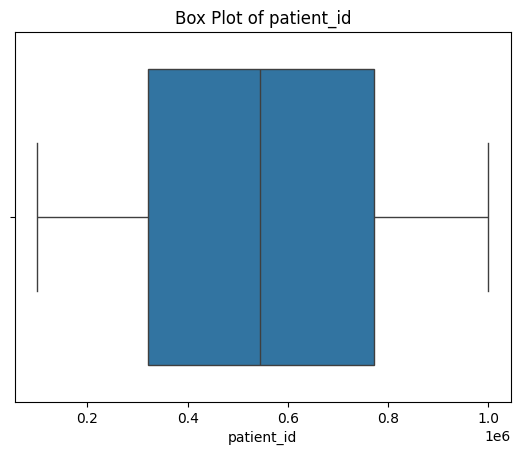

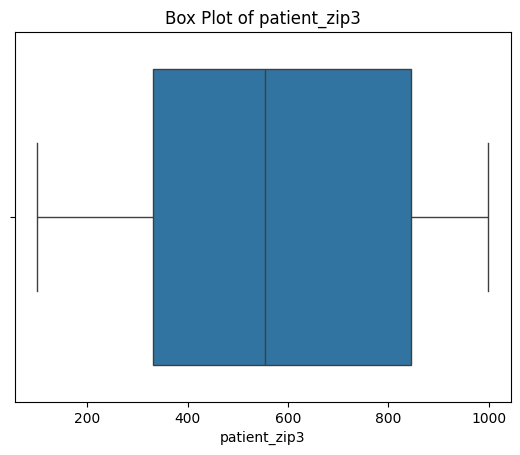

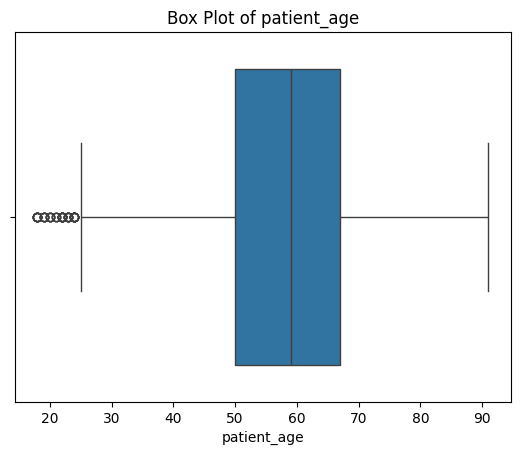

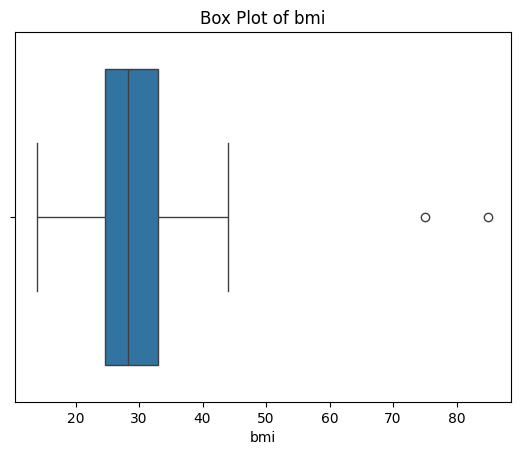

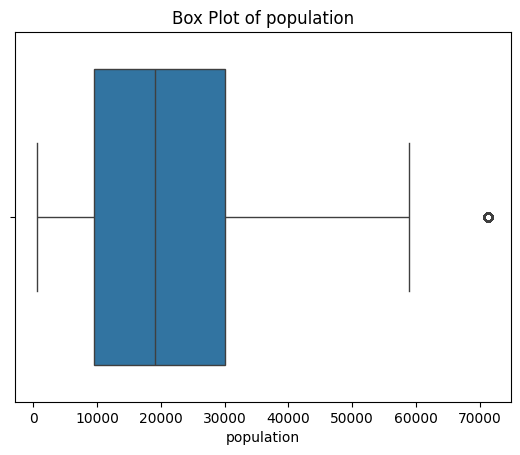

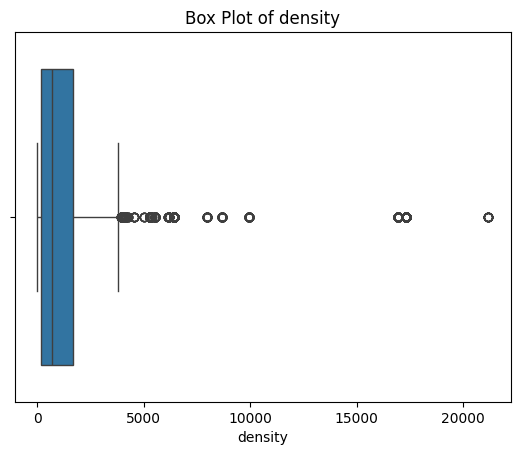

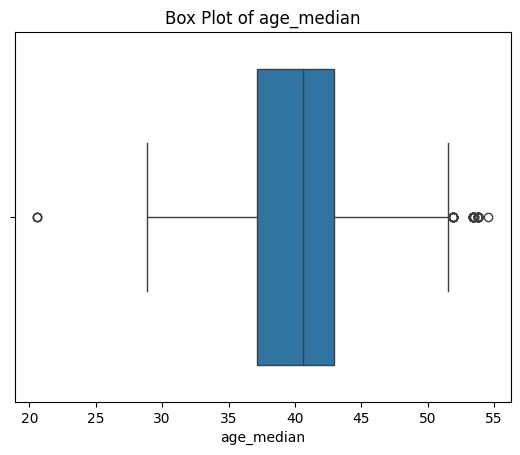

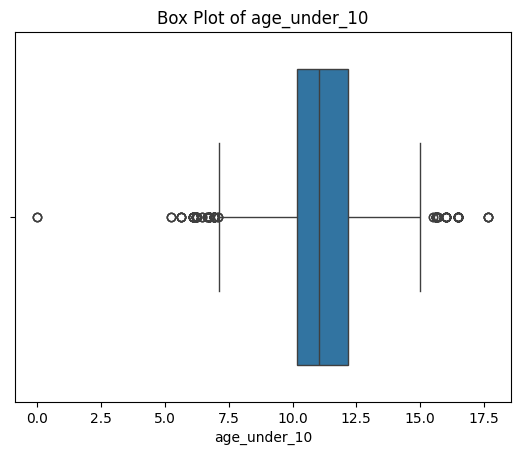

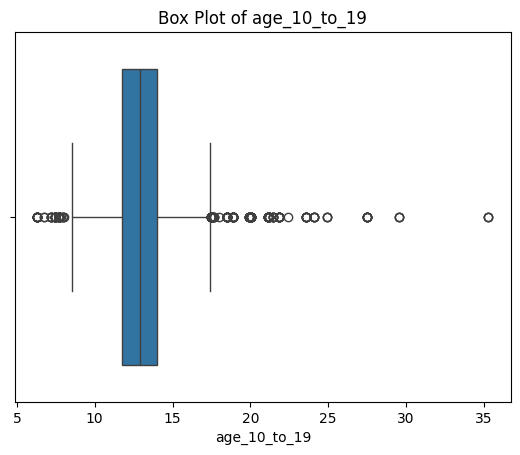

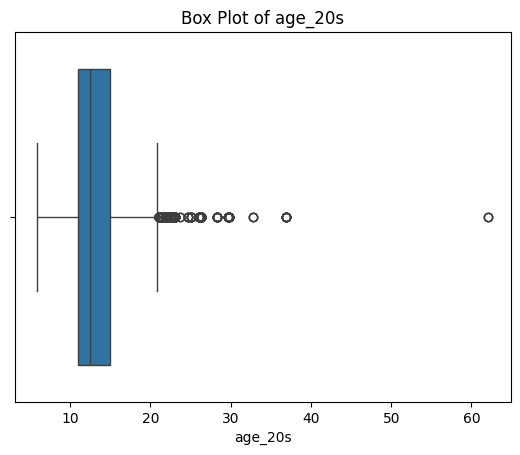

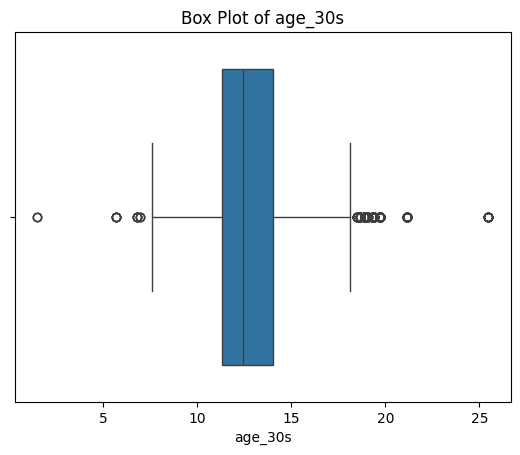

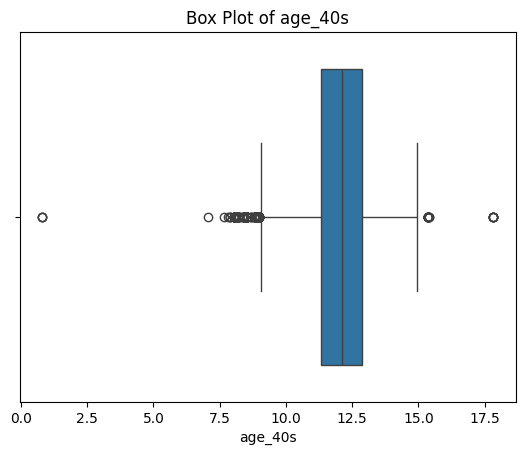

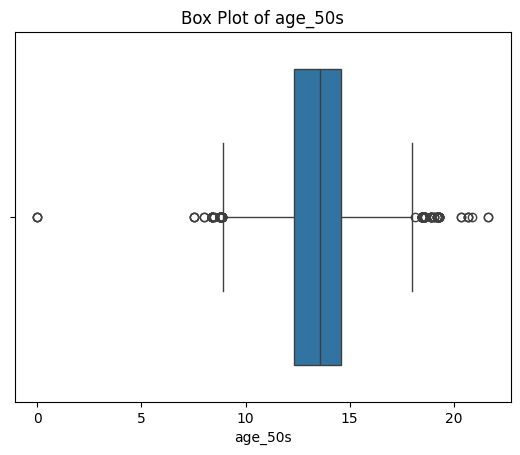

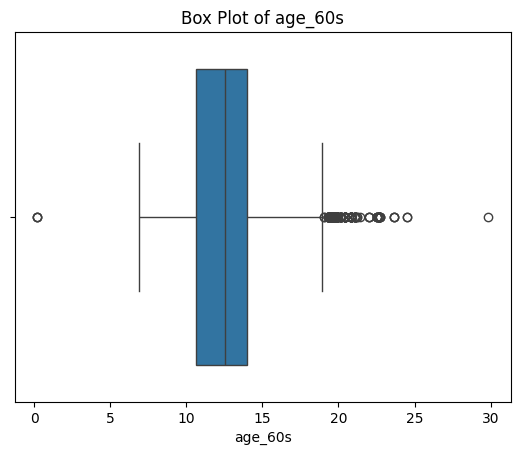

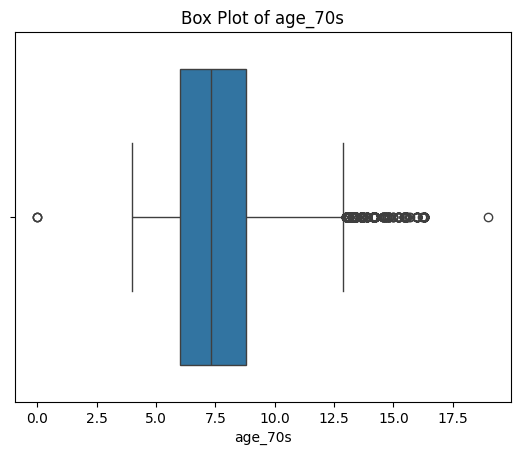

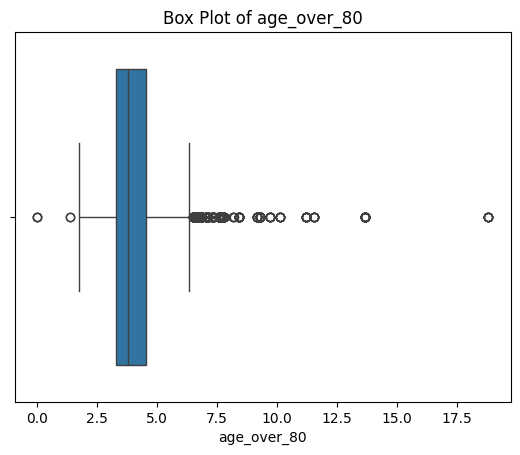

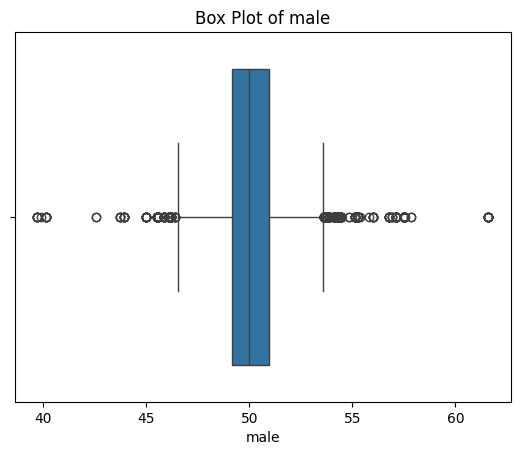

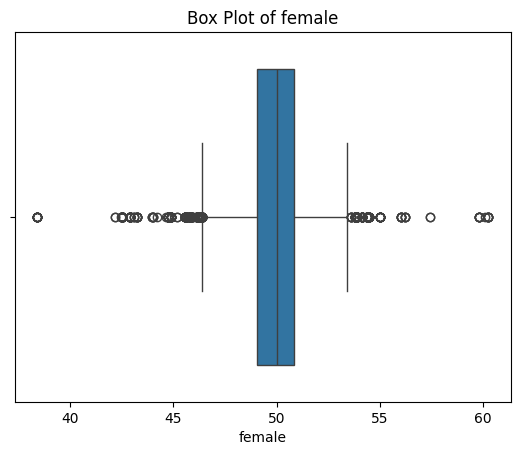

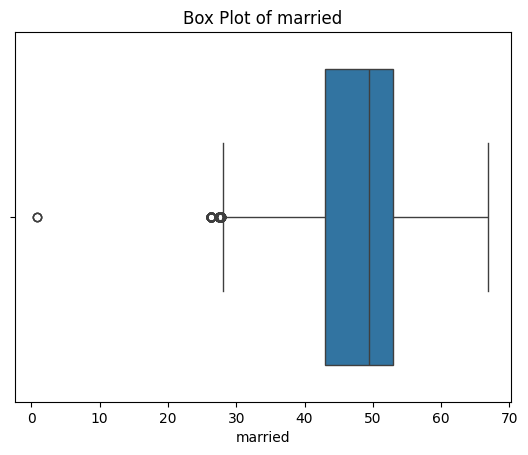

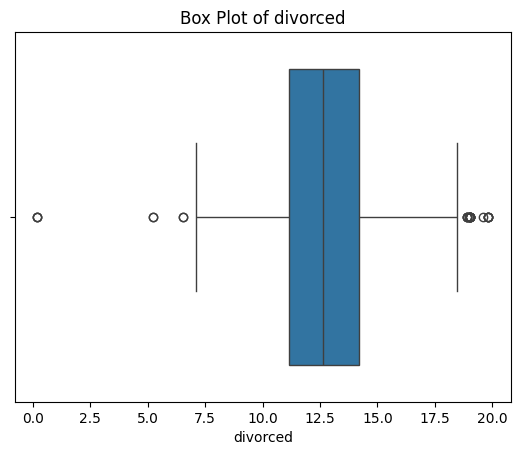

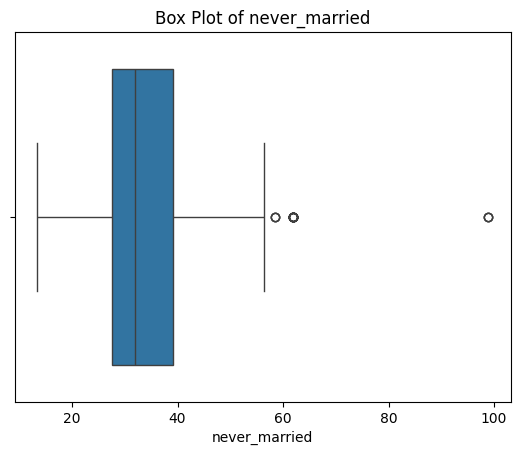

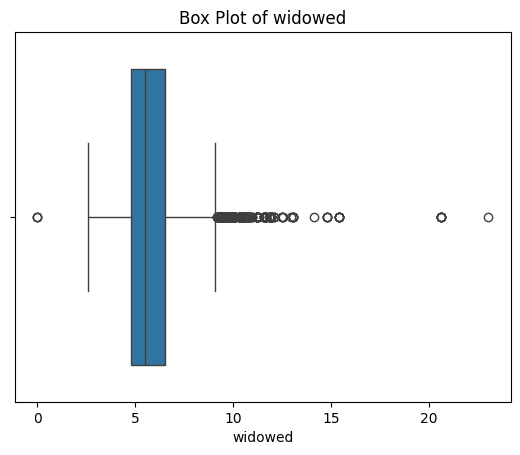

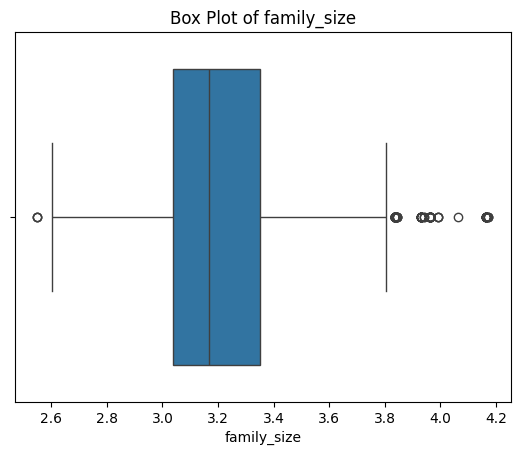

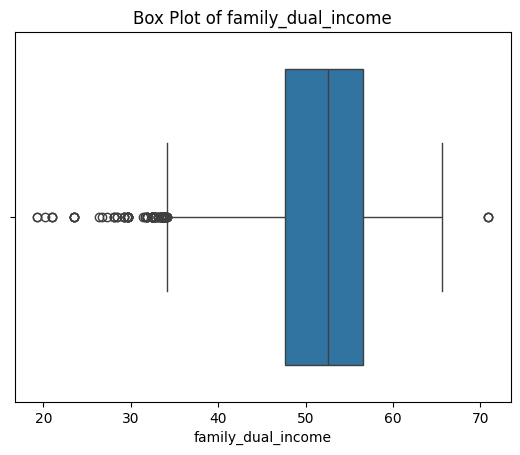

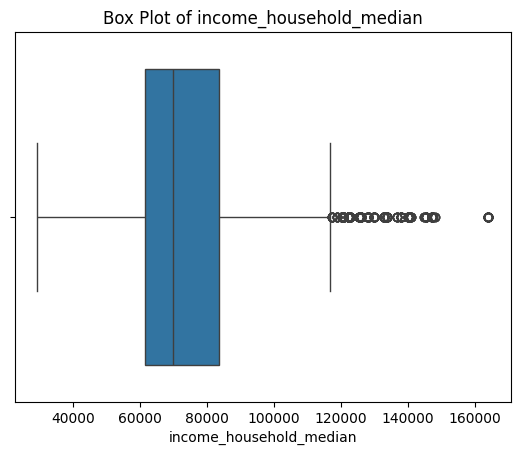

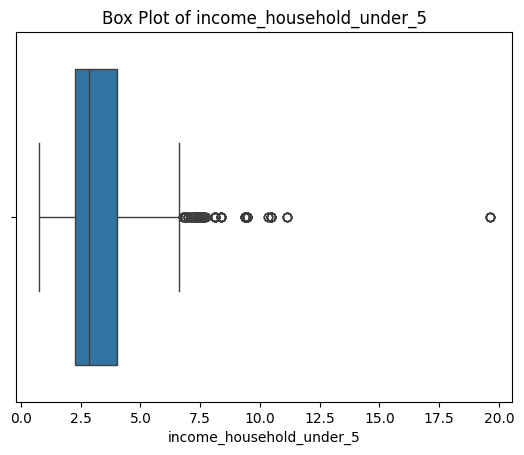

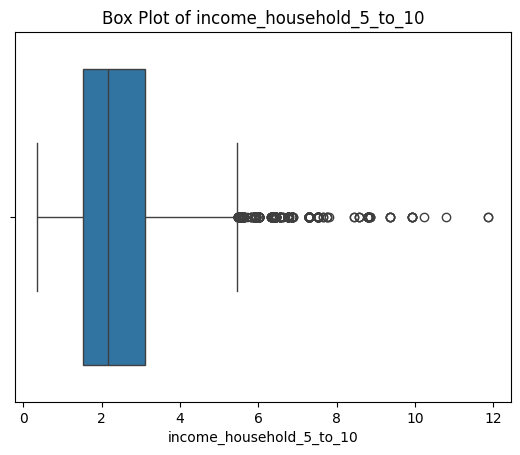

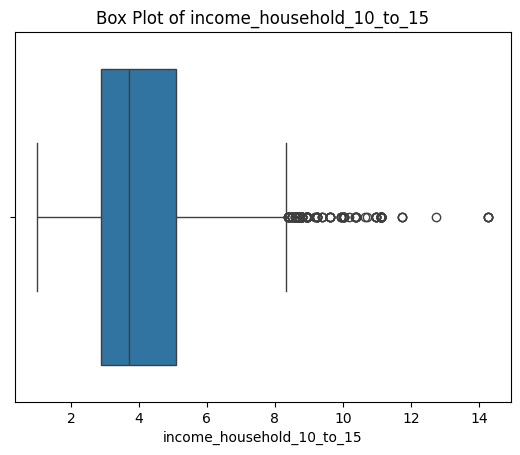

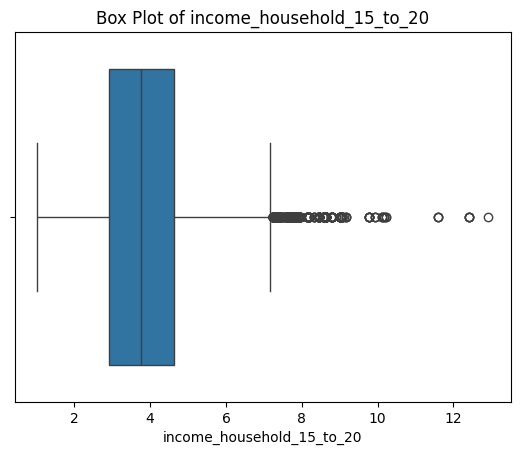

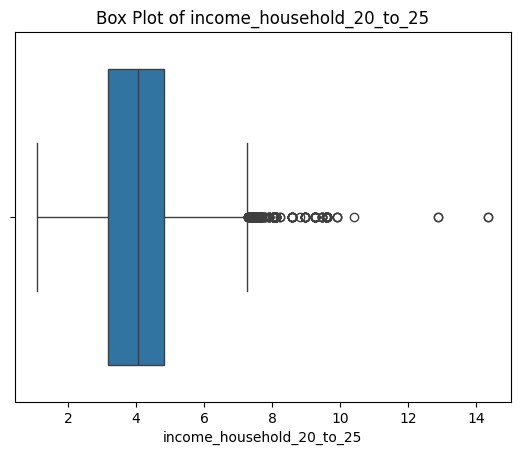

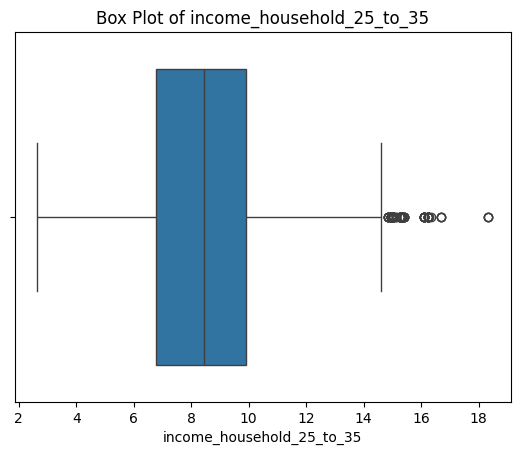

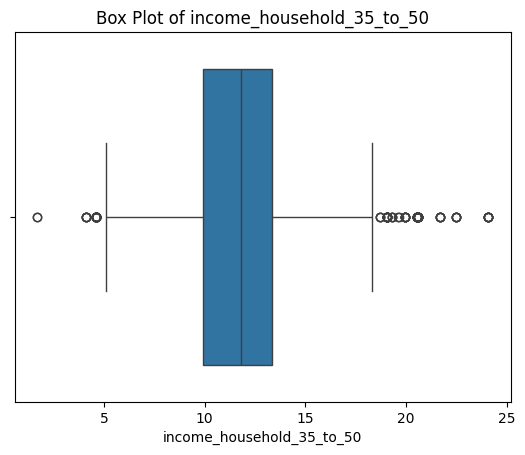

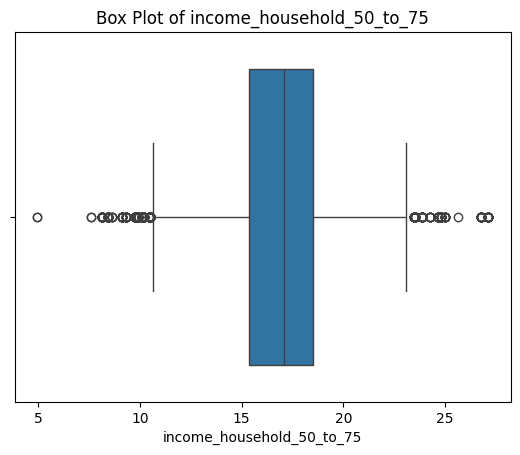

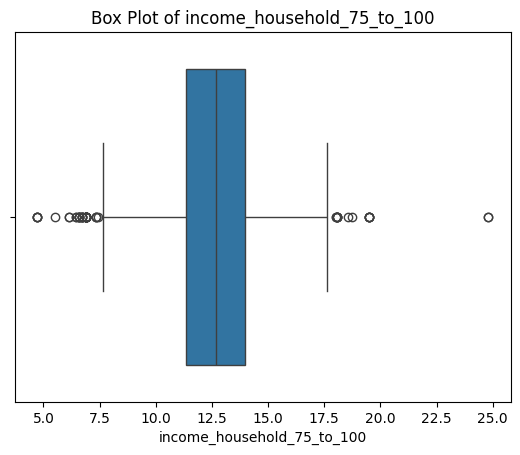

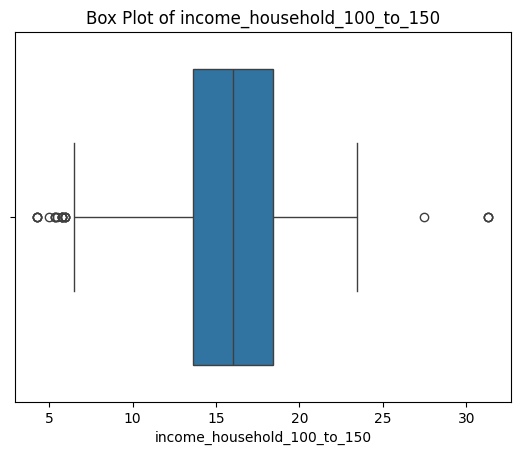

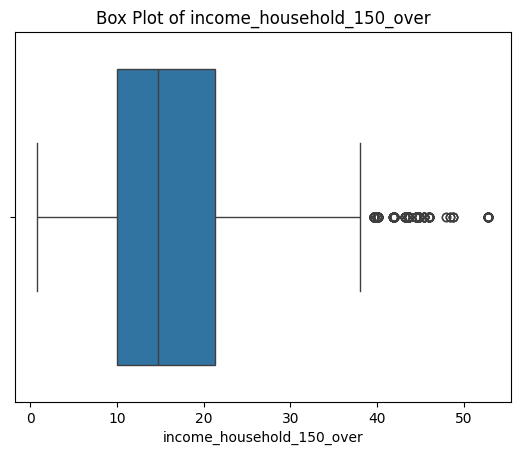

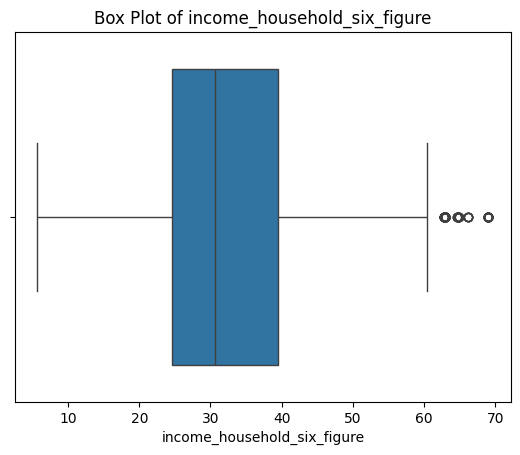

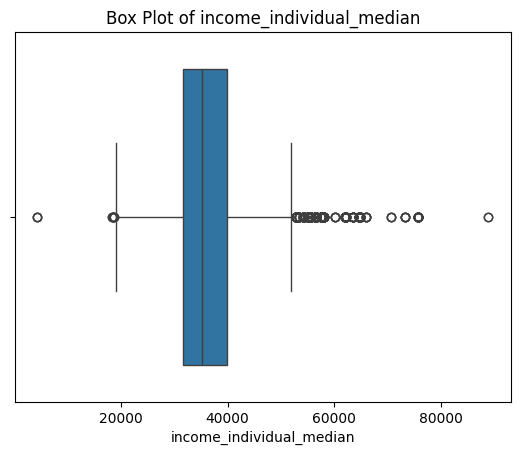

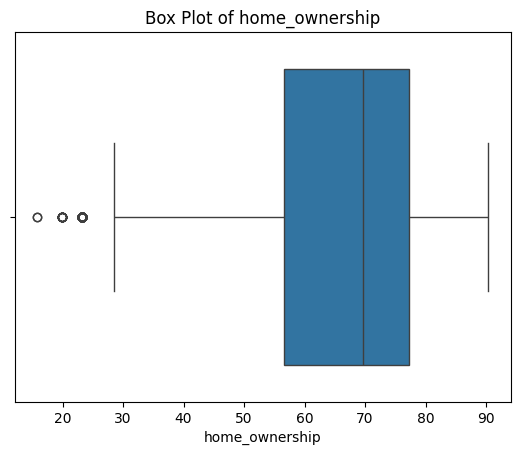

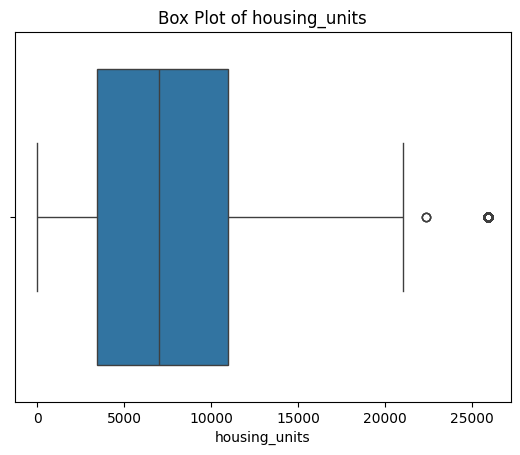

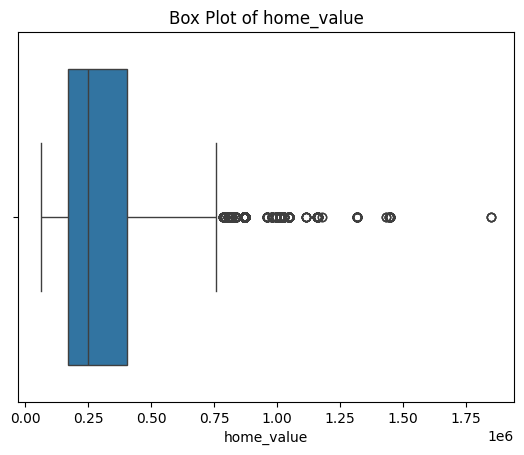

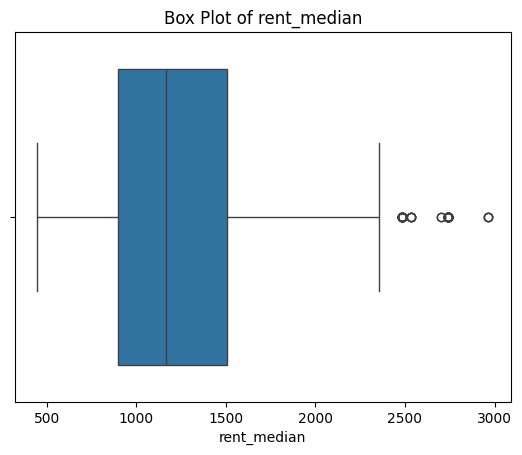

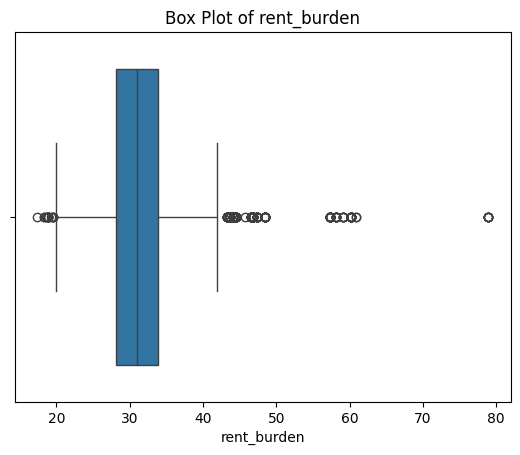

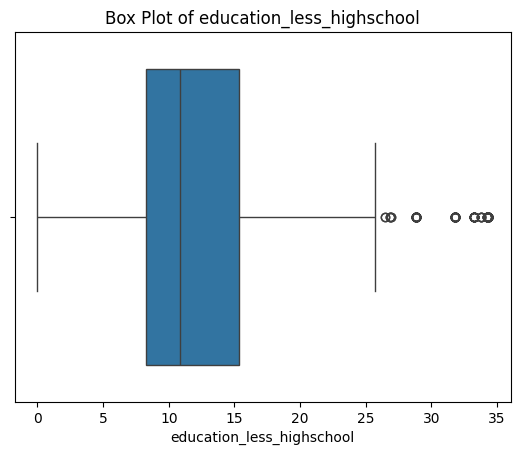

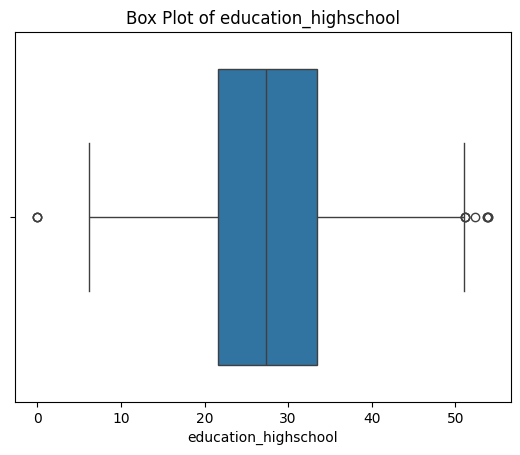

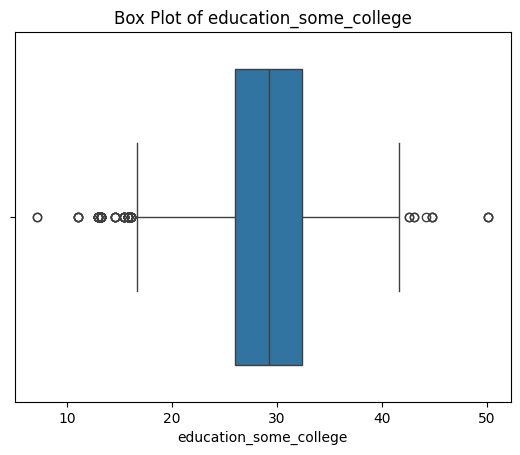

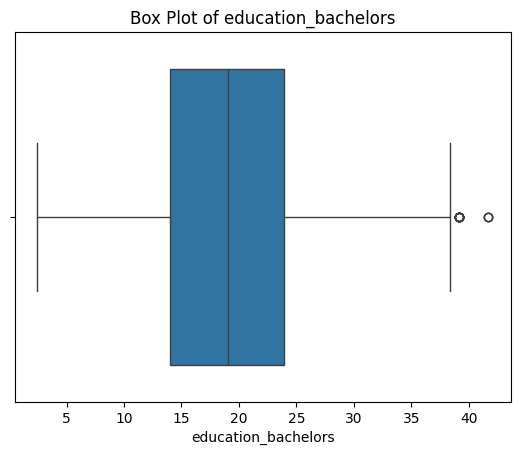

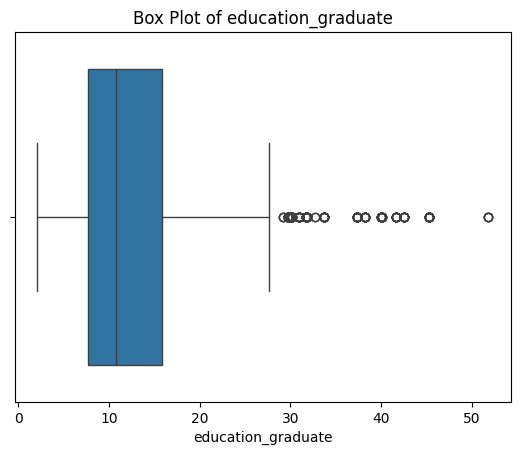

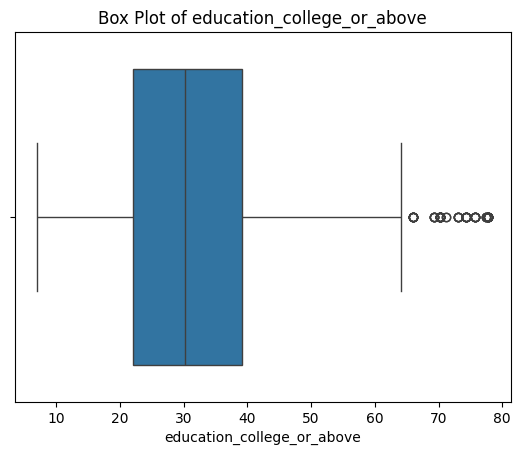

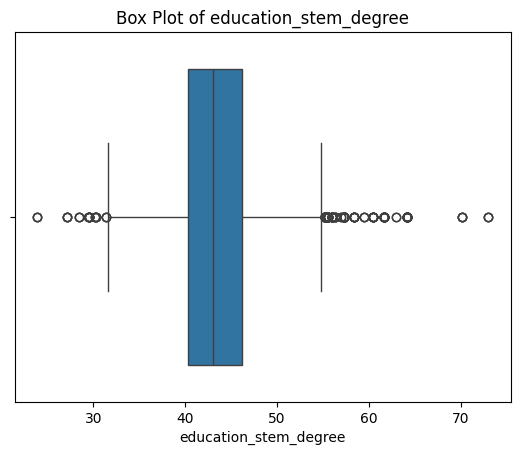

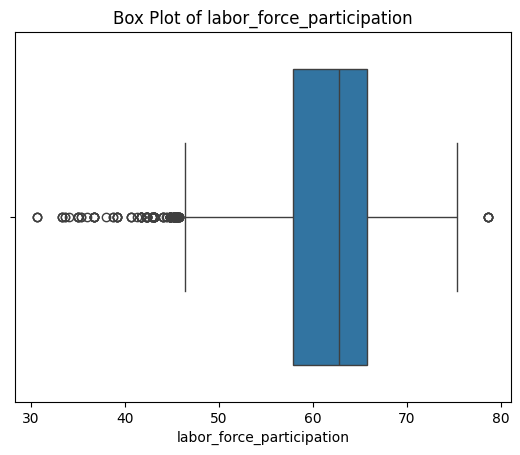

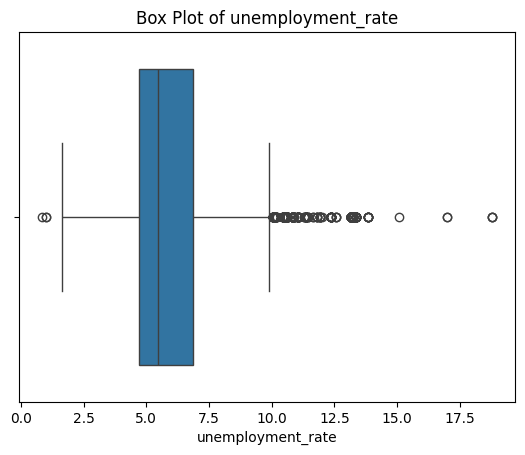

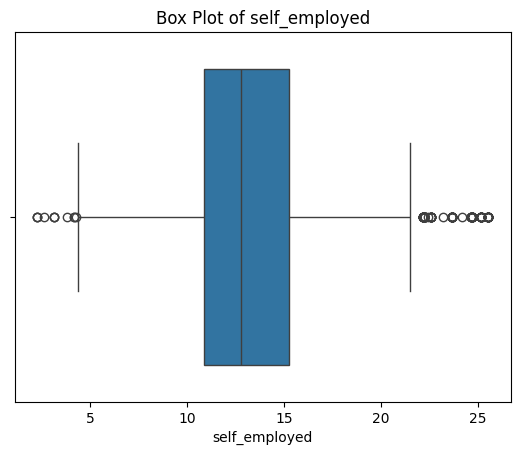

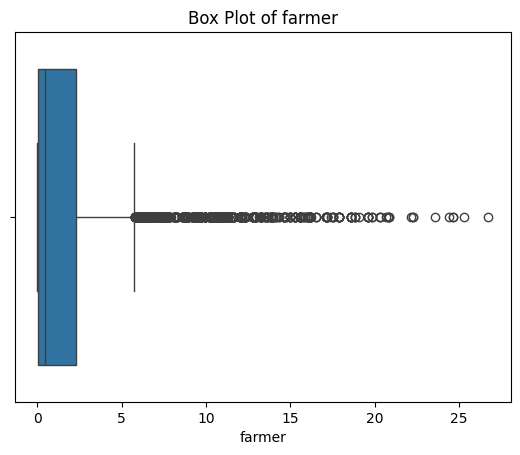

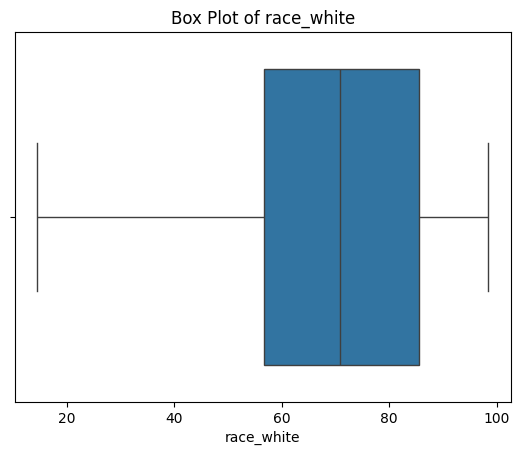

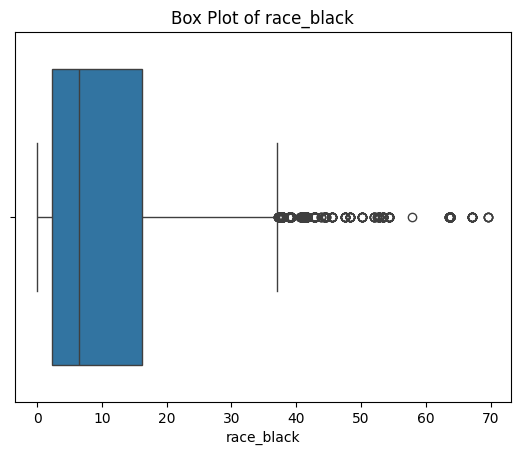

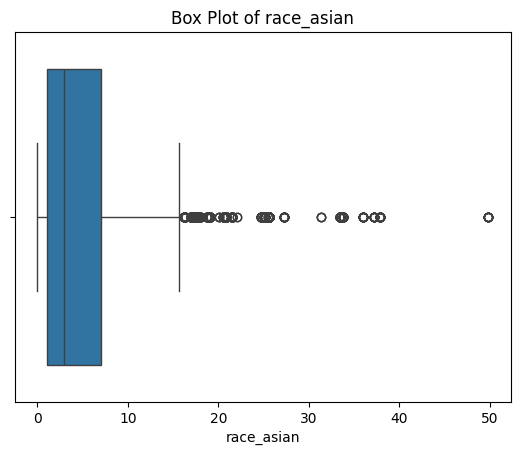

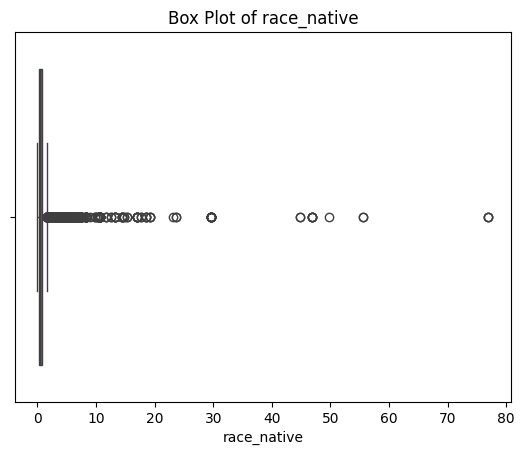

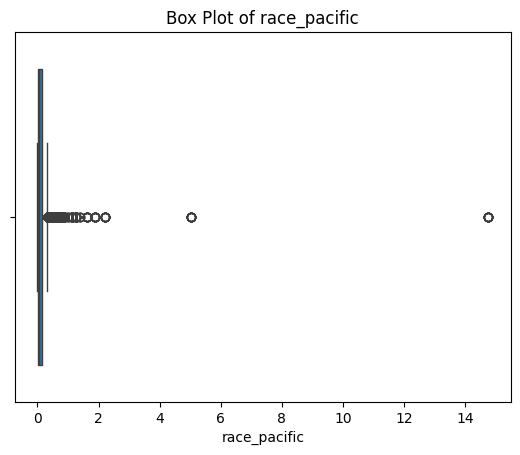

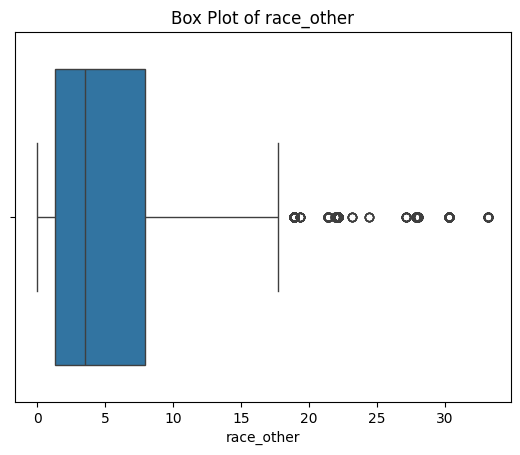

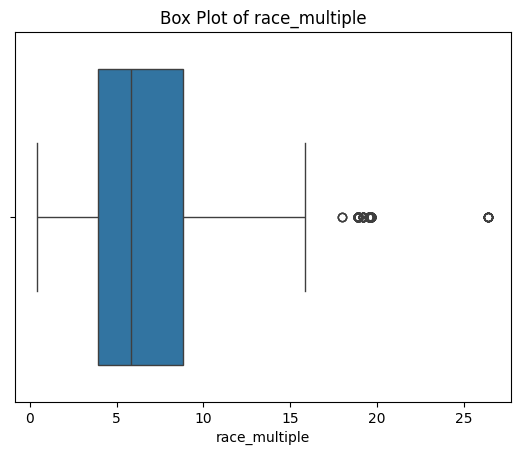

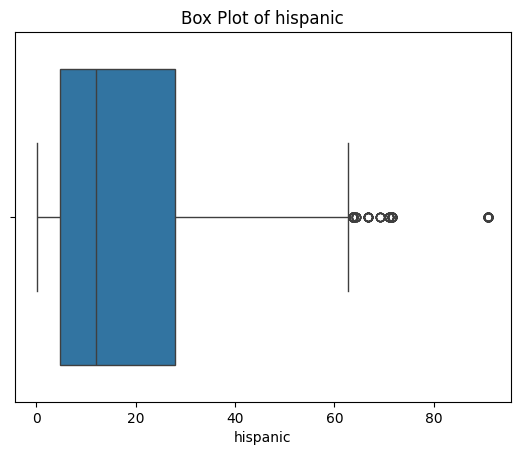

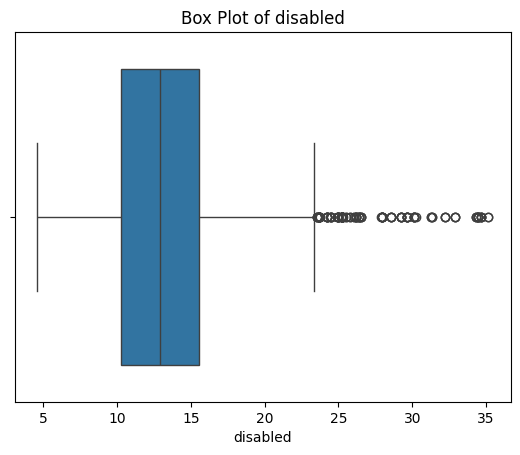

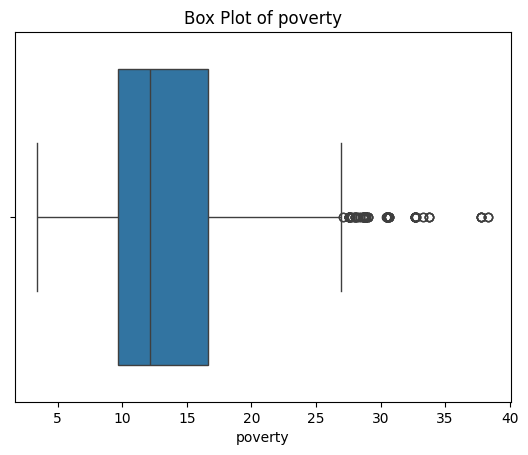

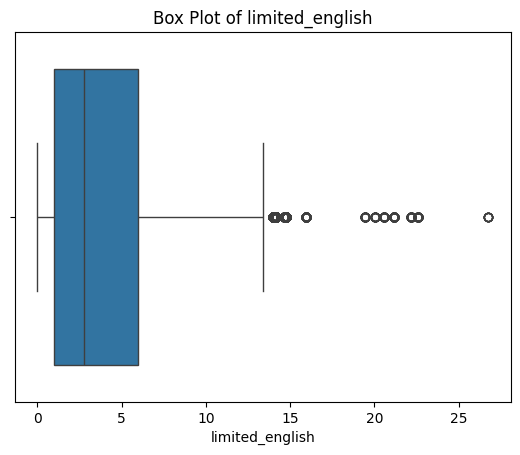

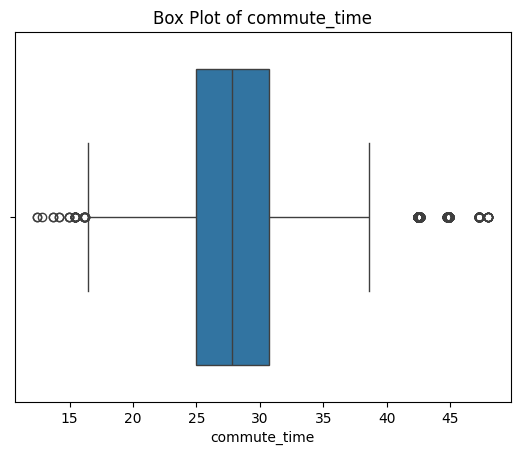

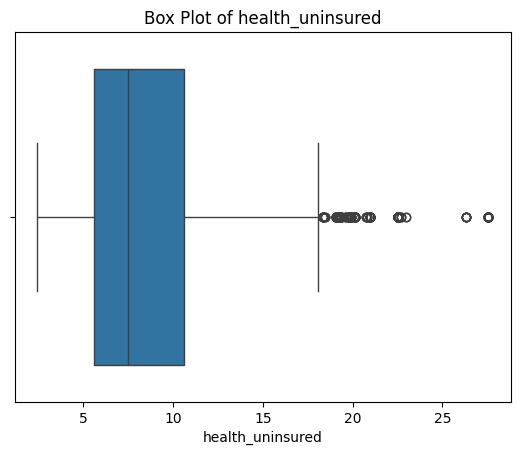

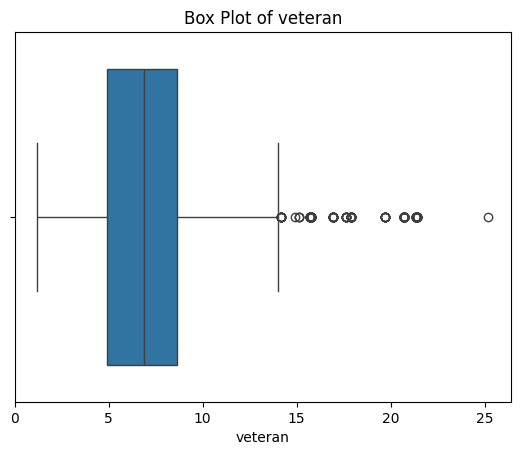

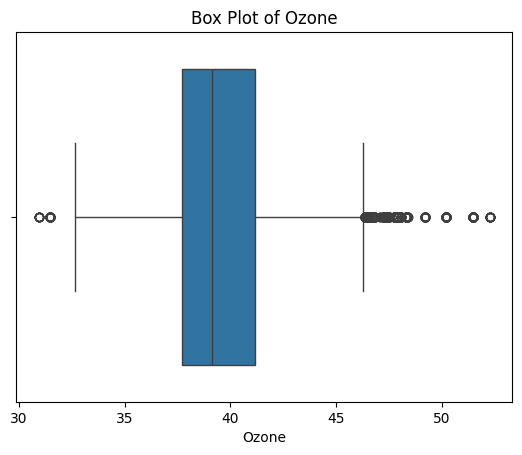

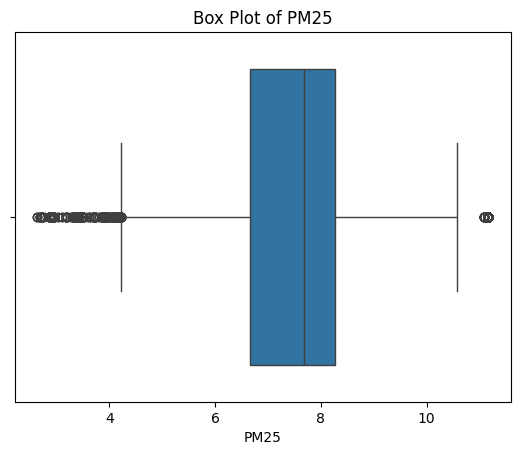

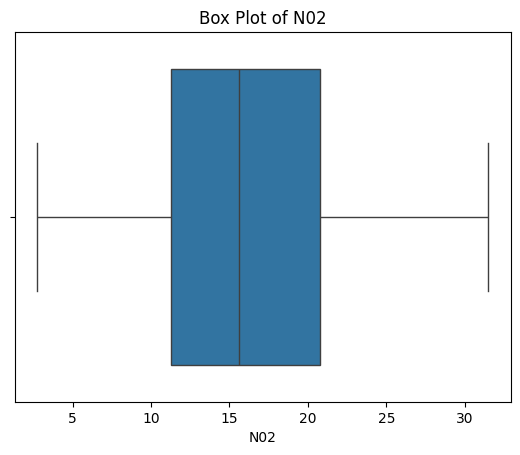

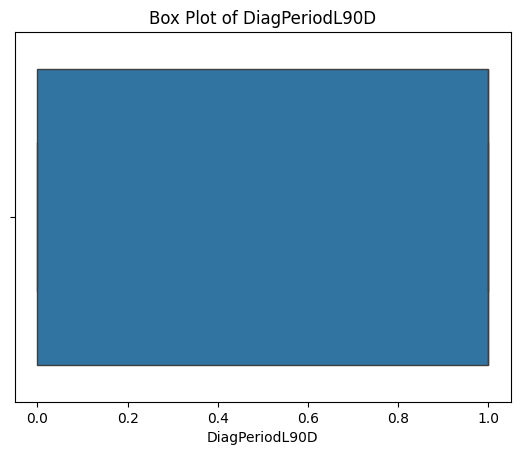

In [14]:
##Checking for outliers
for col in df.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show

In [15]:
num_columns=df.select_dtypes(include=np.number).columns
correlation_matrix=df[num_columns].corr()
print(correlation_matrix)

                patient_id  patient_zip3  patient_age       bmi  population  \
patient_id        1.000000      0.020582     0.008109 -0.005282    0.001216   
patient_zip3      0.020582      1.000000    -0.062820 -0.048912    0.098969   
patient_age       0.008109     -0.062820     1.000000 -0.063885   -0.018048   
bmi              -0.005282     -0.048912    -0.063885  1.000000   -0.037956   
population        0.001216      0.098969    -0.018048 -0.037956    1.000000   
...                    ...           ...          ...       ...         ...   
veteran          -0.004947      0.038637     0.002469  0.027936   -0.500773   
Ozone            -0.007240      0.391243    -0.025899 -0.028554    0.081358   
PM25              0.011283     -0.067037    -0.023002 -0.000955    0.385453   
N02               0.004696     -0.073708     0.014842 -0.038425    0.672527   
DiagPeriodL90D    0.002405      0.036372     0.055634 -0.005710   -0.006576   

                 density  age_median  age_under_10 

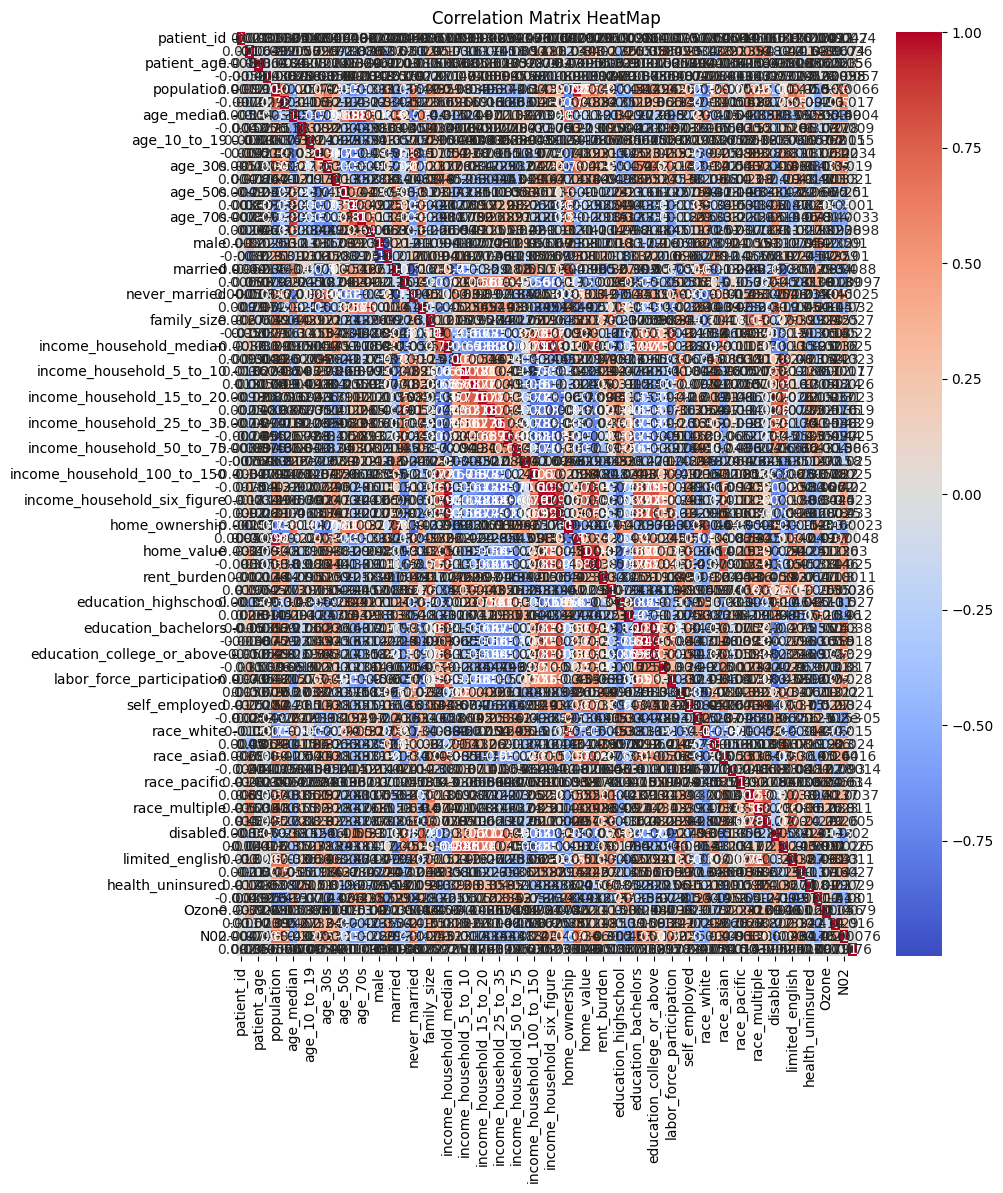

In [16]:
plt.figure(figsize=(10,12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix HeatMap')
plt.show()